In [2]:
import pytorch_lightning as pl
import matplotlib.pyplot as plt
import numpy as np
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from disent.data.groundtruth import XYSquaresData, GroundTruthData
from disent.dataset.groundtruth import GroundTruthDataset
from disent.frameworks.vae import BetaVae
from disent.model.ae import EncoderConv64, DecoderConv64, AutoEncoder
from disent.transform import ToStandardisedTensor
from disent.util import is_test_run

data: GroundTruthData = XYSquaresData(rgb=False)

In [16]:
data._factor_sizes

array([8, 8, 8, 8, 8, 8])

In [2]:
 (data._placements, data._placements) * data._num_squares

(8, 8, 8, 8, 8, 8)

In [4]:
data.observation_shape

(64, 64, 1)

In [65]:
data._factor_sizes

array([8, 8])

In [66]:
data._num_squares

1

In [67]:
 ('x_R', 'y_R', 'x_G', 'y_G', 'x_B', 'y_B')[:data._num_squares*2]

('x_R', 'y_R')

In [68]:
(8,8)*3

(8, 8, 8, 8, 8, 8)

In [78]:
 (data._placements, data._placements)
    

(8, 8)

In [8]:
factors = data.idx_to_pos([0,1])
print(factors)

[[0 0 0 0 0 0]
 [0 0 0 0 0 1]]


In [9]:
from disent.util import iter_chunks
next(iter_chunks(factors, 2))

[array([0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 1])]

In [10]:
offset = data._offset
print('offset: ', offset)
space = data._spacing
print('space: ', space)
size = data._square_size
print('size: ', size)

offset:  0
space:  8
size:  8


In [11]:
for i, (fx, fy) in enumerate(iter_chunks(factors, 2)):
    print('i: ',i)
    print('fx: ', fx)
    print('fy: ', fy)
    print()
    x, y = offset + space * fx, offset + space * fy     
    print('x: ', x)
    print('y: ', y)
    print()

i:  0
fx:  [0 0 0 0 0 0]
fy:  [0 0 0 0 0 1]

x:  [0 0 0 0 0 0]
y:  [0 0 0 0 0 8]



In [49]:
obs = np.zeros(data.observation_shape, dtype=np.uint8)
x = x[-1]
y = y[-1]
obs[y:y+size, x:x+size, :] = data._fill_value

In [85]:
data: GroundTruthData = XYSquaresData(num_squares=1, rgb=False, max_placements=1)
dataset: Dataset = GroundTruthDataset(data, transform=ToStandardisedTensor())
dataloader = DataLoader(dataset=dataset, batch_size=128, shuffle=False)

In [8]:
data.observation_shape

(64, 64, 1)

In [9]:
?np.flip

In [3]:
import torchvision

grid_img = torchvision.utils.make_grid(images,pad_value=1)

plt.imshow(np.transpose(grid_img, (1, 2, 0)))

NameError: name 'images' is not defined

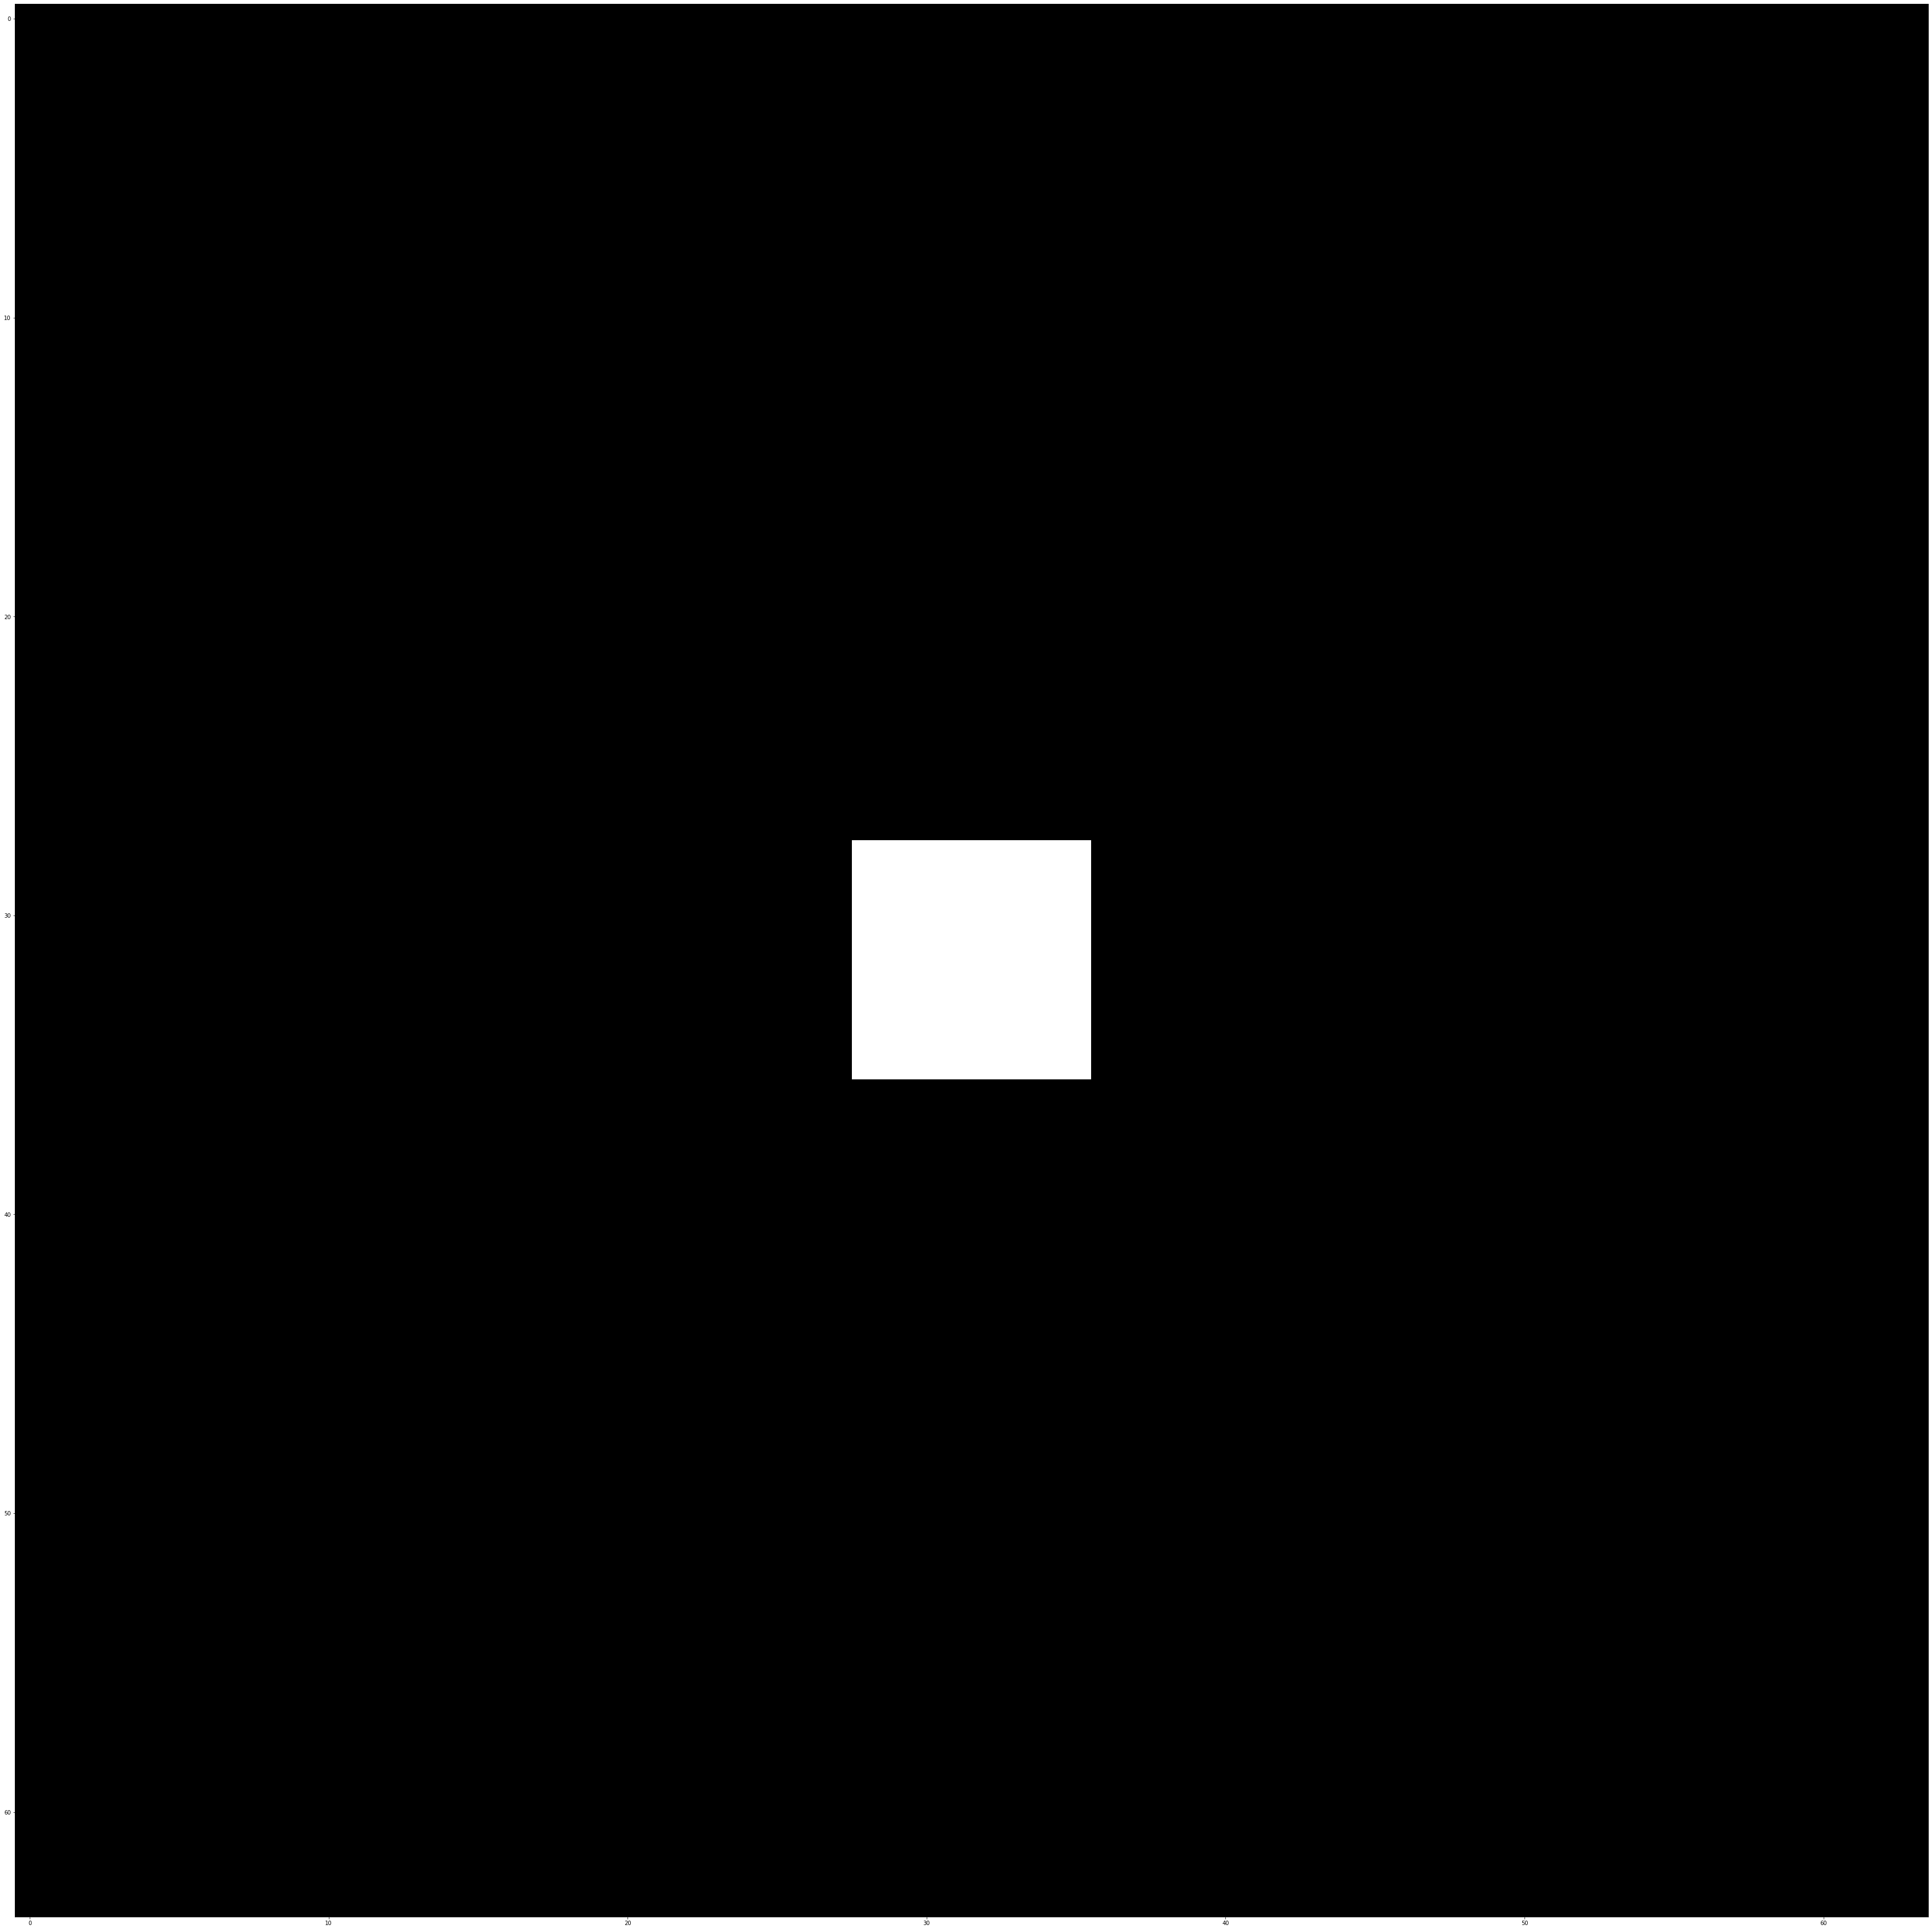

In [88]:
import torchvision

grid_img = torchvision.utils.make_grid(images,pad_value=1)

plt.imshow(np.transpose(grid_img, (1, 2, 0)))

In [46]:
grid_img.shape

torch.Size([3, 68, 4226])

In [92]:
data._offset

64

In [93]:
data._placements

1

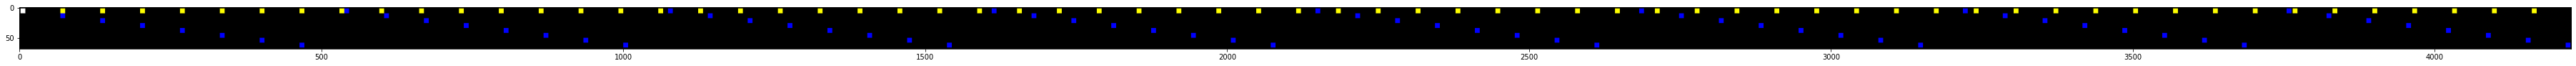